# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

from numpy.f2py.rules import numpy_version


In [29]:
data = pd.read_csv('data/forestfires.csv')

day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

data['day'] = data['day'].map(day_mapping)
data['month'] = data['month'].map(month_mapping)

X_initial = data[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]]
Y_initial = data[["area"]]

X_initial.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [3]:
Y_initial.head()

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [4]:
def h(X, W):
    return np.dot(X, W)

In [5]:
def Error(X, W, Y,lam):
  return np.sum((Y - h(X, W)) ** 2) / (2 * len(X)) + lam 

# * np.sum(W ** 2)

In [6]:
def derivada(X, W, Y, lam):
    # write your code here
    # Return a (k+1)x1 vector. This vector contains the derivatives from Loss function
    # respect to all variable w_j
    yh = (Y-h(X, W)).transpose()
    dwj = np.dot(yh, -1 * X).transpose() / len(Y) + 2 * lam * W
    return dwj

In [7]:
def update(W,  dW, alpha):
  # write your code here
  return W - dW * alpha

In [35]:
def train(X, Y, epochs, alfa,lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    print(W)
    L = Error(X,W,Y,lam)
    print("Inicial", L)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y,lam)
        W = update(W, dW, alfa)
        L = Error(X, W,Y,lam)
        loss.append(L)
        if i%100000==0:
            print("Final", L)
    print(W)
    return W, loss

In [9]:
#Plotear la ecuación
def conver_matrix(X, p):
  potencia = [i for i in range(p)]
  XX = [ [ e**i for e in X ] for i in potencia]
  return np.array(XX).T



In [25]:
def conver_matrix2(X, p):
    n_cols = X.shape[1]
    XX = np.hstack([X**i for i in range(p)])
    return np.array(XX)  

In [14]:
x_isi = np.array(X_initial["ISI"])
y_area = np.log(2 + np.array(Y_initial["area"]))

x_isi  = (min(x_isi) - x_isi)/(max(x_isi) - min(x_isi))
y_area  = (min(y_area) - y_area)/(max(y_area) - min(y_area))

xx_isi = conver_matrix(x_isi,6)

# w , loss = train(xx_isi,y_area, 10000, 0.9, 0.1)
# 
# 
# plt.plot(x_isi,y_area,"*")
# y_aprox = h(xx_isi,w)
# 
# 
# plt.plot(x_isi,y_aprox,"o")

(517, 6)


In [102]:

x_vars = np.array(X_initial[["X","Y", "month",	"day",	"FFMC",	"DMC", "DC", "ISI",	"temp",	"RH",	"wind",	"rain"]])

y_area = np.log(1 + np.array(Y_initial["area"]))

min_vals = np.min(x_vars)
max_vals = np.max(x_vars)
x_norm = abs((min_vals - x_vars) / (max_vals - min_vals))

y_norm  = abs((min(y_area) - y_area)/(max(y_area) - min(y_area)))


xx_vars = conver_matrix2(x_norm, 3)
print(xx_vars.shape)

(517, 36)


[0.16712564 0.08099804 0.96022574 0.93845024 0.62085885 0.42560197
 0.68978129 0.24203462 0.36660064 0.14195103 0.21019224 0.90794452
 0.64405072 0.20727221 0.43596563 0.95635709 0.69778773 0.52989243
 0.58110074 0.33954328 0.81749589 0.08160132 0.65421571 0.64452427
 0.90425307 0.82497026 0.26373263 0.43155152 0.49897241 0.15030076
 0.40642355 0.05687411 0.64351347 0.65772245 0.06606537 0.64535942]
Inicial 20.3667566629669
Final 0.14836764561830604
[ 1.16909702e-02  1.16909617e-02  1.16910487e-02  1.16910465e-02
  1.16910151e-02  1.16909958e-02  1.16910219e-02  1.16909776e-02
  1.16909900e-02  1.16909677e-02  1.16909745e-02  1.16910435e-02
  2.39103181e-04  1.19663962e-04  3.15428666e-04  5.80212528e-05
  1.44793337e-03  4.41552565e-03  1.51843915e-02  2.39249083e-05
  4.89438366e-04 -3.92475080e-04  2.10705081e-04  7.85097794e-06
  2.79764705e-06  8.92195320e-07  4.71900861e-06  5.10629843e-07
  1.60006054e-04  1.14028388e-03  1.18255173e-02 -4.62298925e-06
  2.47770172e-05 -9.061753

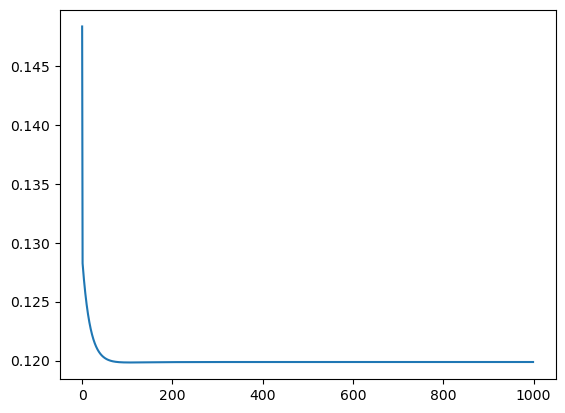

In [103]:
w , loss = train(xx_vars,y_norm, 1000, 0.08, 0.1)
plt.plot(loss)

# y_aprox = h(xx_isi,w)


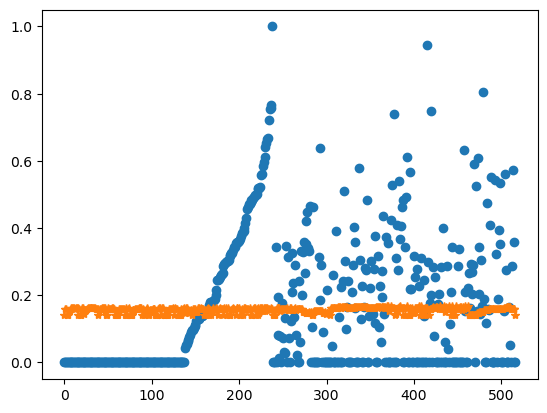

In [104]:
y_aprox = h(xx_vars,w)
plt.plot(y_norm, "o")
plt.plot(y_aprox, "*")

In [105]:
from sklearn.metrics import r2_score

den_r2 = (y_norm - np.mean(y_norm))**2
num_r2 = (y_aprox - np.mean(y_norm))**2
r2 = np.sum(num_r2) / np.sum(den_r2)
print(r2)
print(r2_score(y_norm,y_aprox))

0.0017077763671522978
0.003486659814211923


In [106]:
print(w)

[ 1.16909702e-02  1.16909617e-02  1.16910487e-02  1.16910465e-02
  1.16910151e-02  1.16909958e-02  1.16910219e-02  1.16909776e-02
  1.16909900e-02  1.16909677e-02  1.16909745e-02  1.16910435e-02
  2.39103181e-04  1.19663962e-04  3.15428666e-04  5.80212528e-05
  1.44793337e-03  4.41552565e-03  1.51843915e-02  2.39249083e-05
  4.89438366e-04 -3.92475080e-04  2.10705081e-04  7.85097794e-06
  2.79764705e-06  8.92195320e-07  4.71900861e-06  5.10629843e-07
  1.60006054e-04  1.14028388e-03  1.18255173e-02 -4.62298925e-06
  2.47770172e-05 -9.06175338e-05  2.06251564e-06  1.61567645e-07]
